# Lecture 14 - Clustering

***
##### CS 434 - Data Mining and Machine Learning
##### Oregon State University-Cascades
***

## <img src="https://img.icons8.com/color/32/000000/fork-lift.png"/>  Load packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from IPython.display import Image

# <img src="https://img.icons8.com/color/32/000000/mind-map.png"/>   K-means clustering

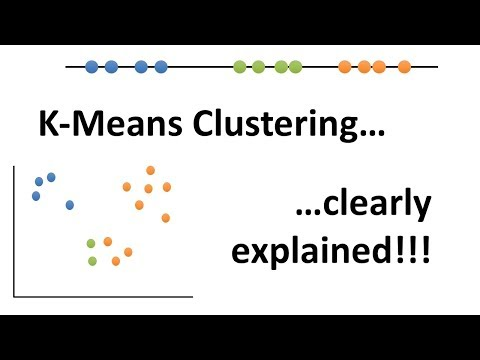

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('4b5d3muPQmA')

### <img src="https://img.icons8.com/color/32/000000/k.png"/>  K-Means algorithm

1. Randomly pick $k$ centroids from the sample points as initial cluster centers.
2. Assign each sample to the nearest centroid, $\mu^{(j)},j\in\{1,\ldots, k\}$.
3. Move the centroids to the center of the samples that were assigned to it.
4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached.

#### <img src="https://img.icons8.com/color/32/000000/terms-and-conditions.png"/> Similarity

We can define similarity as the opposite of distance. *Squared Euclidean distance* is the distance between two points $\mathbf{x}$ and $\mathbf{y}$ in $m$-dimensional space. 

$$ d(\mathbf{x},\mathbf{y}) ^2 = \sum_{j=1}^m \ (x_j - y_j)^2 = \lVert \mathbf{x} - \mathbf{y} \rVert^2_2$$

#### <img src="https://img.icons8.com/color/32/000000/plus.png"/>  Sum of square errors (SSE)
The k-means algorithm is an optimization problem, iteratively minimizing the inner-cluster *sum of square errors* (SSE).

$$SSE = \sum^n_{i=1} \sum^k_{j=1} \ w^{i,j} \ \lVert x^{i} - \mu^{j} \rVert^2_2$$

where:
* $i$ is the index of an individual example, drawn from $n$ total examples,
* $j$ is the index of an individual cluster, drawn from $k$ total clusters,
* $\mu^{j}$ is the the cluster centroid for cluster $j$, and
* $w^{i,j} =
   \begin{cases} 
       1,\ \text{if} \ x^i \in j \\
       0,\ \text{otherwise}
   \end{cases}$

***
#### <img src="https://img.icons8.com/color/24/000000/error.png"/>  **Feature Scaling**


When applying K-Means using Euclidean distance, first apply z-score standardization or min-max normalization to the data.
***

### <img src="https://img.icons8.com/color/32/000000/new-document.png"/>  K-Means Example

##### Sample data
Create a dataset of 150 randomly generated points, grouped into three regions and visualized using a 2d scatterplot.

In [0]:
# make data
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

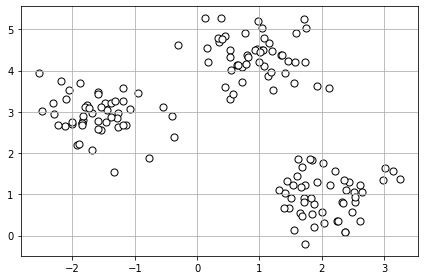

In [0]:
# show data
plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

#### `KMeans`

In [0]:
# train KMeans
km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)
y_km

array([2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2], dtype=int32)

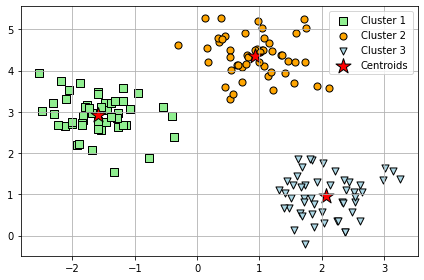

In [0]:
# scatter plot
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

# <img src="https://img.icons8.com/color/32/000000/speed.png"/> Evaluating clusters

## <img src="https://img.icons8.com/color/32/000000/k.png"/>   Choosing $k$

Using a random seed to place initial centroids can somethimes result in bad clusterings or slow convergence. One approach is to run $k$-Means algorithm multiple times on a dataset and choose the best performing model.

Another strategy is to place initial centroids far away from each other and use the $k$-Means$++$ algorithm.



### <img src="https://img.icons8.com/color/32/000000/serial-tasks.png"/> $k$-Means$++$ algorithm

1. Initialize an empty set $\textbf{M}$ to store the $k$ centroid being selected. 

2. Randomly choose the first centroid $\mu^j$ from the input examples and assign it to $\textbf{M}$.

3. For each example $x^i$ that is not in $\textbf{M}$, find the minimum squared distance $d(\textbf{x}^i, \textbf{M})^2$ to any of the centroids in $\textbf{M}$.

4. To randomly select the next centroid $\mu^p$ use a weighted probability distribution equal to ${{d(\mu^p, \textbf{M})^2} \over {\sum_i d(\textbf{x}^i, \textbf{M})^2} }$.

5. Repeat steps 2 and 3 until $k$ centroids are chosen.

6. Proceed with the classic $k$-Means algorithm. 

## <img src="https://img.icons8.com/color/32/000000/elbow-pain.png"/> Elbow method

We use metrics, such as within-cluster SSE (distortion), to compare the performance of different $k$-Means clusterings.

In [0]:
# view SSE via intertia_
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


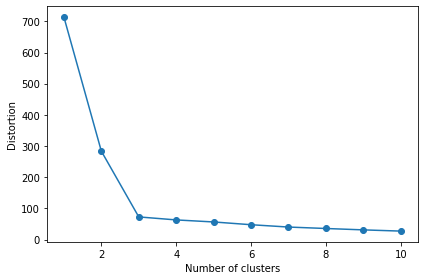

In [0]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

<br>

## <img src="https://img.icons8.com/color/32/000000/shadow-photography.png"/> Silhouette plots

Silhouette analysis can be used to measure how tightly grouped the examples in the cluster are. 

1. Calculate the **cluster cohension** $a^i$ as the average distance between an example $x^i$ and all other points in the same cluster.

2. Calculate the **cluster separation** $b^i$ from the next closest cluster as the average distance between the example $x^i$ and all examples in the nearest cluster.

3. Calculate the silhouette $s^i$ as the difference between cluster cohension and separation divided by the greater of the two.

$$s^i = {{b^i - a^i} \over {\max{\{b^i, a^i\}}}}$$


The silhouette coefficient is bounded in range $-1$ to $1$. The coefficient is $0$ if the cluster separation and cohesion are equal ($b^i = a^i$). It approaches the ideal silhouette of $1$ if $b^i \gg a^i$, as $b^i$ quantifies how dissimilar an example is from other clusters and $a^i$ tells us how similar it is to the other examples in its own cluster. 

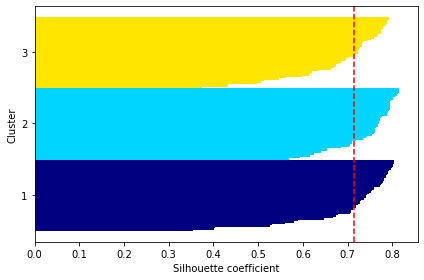

In [0]:
# silhouette coefficient: "good"
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

The above represents "good clustering" since the silhouette coefficients are not close to $0$.

Now compare to "bad" clustering.

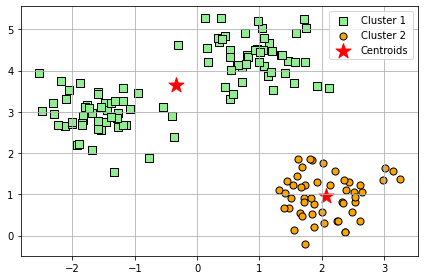

In [0]:
# generate "bad" clusters
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

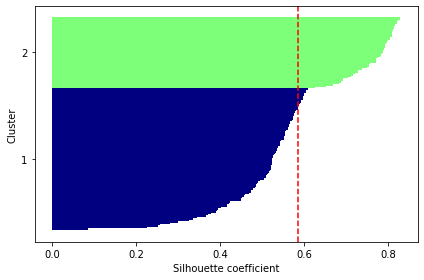

In [0]:
# silhouette coefficient: "bad"
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

<br>
<br>

# <img src="https://img.icons8.com/color/32/000000/genealogy.png"/> Hierarchical clustering

Hierarchical clustering is that is allows us to plot dendograms which can help with the interpretation of results by providing meaningful taxonomies. 

Another advantage of this hierarchical approach is that we do not need to specify the number of clusters upfront.

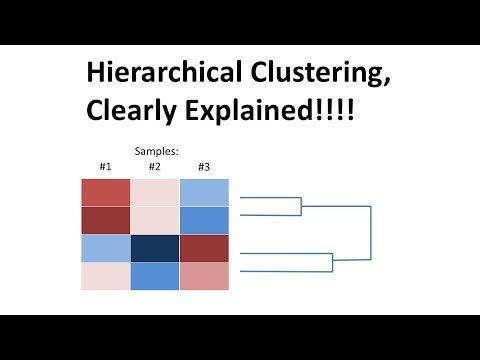

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('7xHsRkOdVwo')

## <img src="https://img.icons8.com/color/32/000000/link.png"/> Agglomerative clustering

In the **single linkage** approach, we compute the distances between the most similar members for each pair of clusters and merge the two clusters for which the distance between the most similar members is the smallest.

In the **complete linkage** approach, we instead compare the most dissimilar members to perform the merge. 

![alt text](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch11/images/11_07.png?raw=true)

### <img src="https://img.icons8.com/color/32/000000/serial-tasks.png"/>  Algorithm

Agglomerative clustering with complete-linkage
1. Compute the distance matrix of all examples.
2. Represent each data point as a singleton cluster.
3. Merge the two closest clusters based on the distance between the most dissimilar (distant) members.
4. Update the similarity matrix.
5. Repeat steps 2-4 until one single cluster remains.

## <img src="https://img.icons8.com/color/32/000000/ruler.png"/> Distance matrix

In [0]:
# generate random data
np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [0]:
# distance matric
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


We can either pass a condensed distance matrix (upper triangular) from the `pdist` function, or we can pass the "original" data array and define the `metric='euclidean'` argument in `linkage`. However, we should not pass the squareform distance matrix, which would yield different distance values although the overall clustering could be the same.

In [0]:
# 1. incorrect approach: Squareform distance matrix
row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


In [0]:
# 2. correct approach: Condensed distance matrix
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [0]:
# 3. correct approach: Input matrix
row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


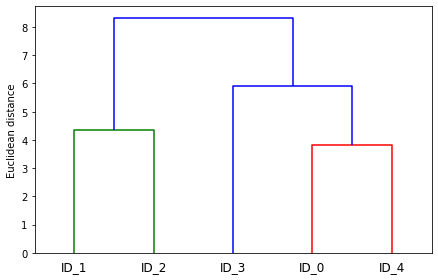

In [0]:
# make dendrogram
row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

<br>

## <img src="https://img.icons8.com/color/32/000000/heat-map.png"/> Heat map

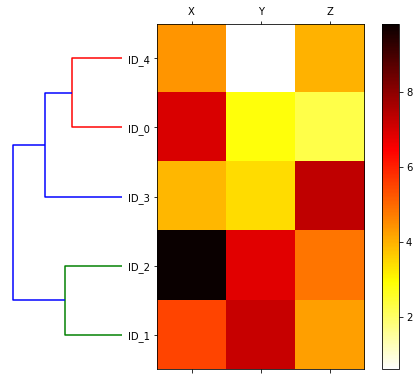

In [0]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

<br>

## <img src="https://img.icons8.com/color/32/000000/test-tube.png"/> Implementation with  `scikit-learn` 

In [0]:
# three clusters
ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


In [0]:
# two clusters
ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


# <img src="https://img.icons8.com/color/32/000000/d"/> <img src="https://img.icons8.com/color/32/000000/b.png"/> DBSCAN

In **density-based spatial clustering of applications with noise** (DBSCAN) assigns cluster labels based on dense regions of points. In DBSCAN, the notion of density is defined as the number of points with a specified radius $\epsilon$.


A special label is assigned to each example using the following criteria:

* A point is considered a **core point** if at least a specified number (`MinPts`) of neighboring points fall within the specified radius of a core point.

* A **border point** is a point that has fewer neighbors than `MinPts` with $\epsilon$, but lies within the $\epsilon$ redius of a core point.

* All other points that are neither core nor border points are considered **noise points**. 

After labeling the points as *core*, *border*, or *noise*, the DBSCAN algorithm can be summarized in two steps:

1. Form a separate cluster for each core point or connected group of core points. 

> Core points are connected if they are no farther away than $\epsilon$.

2. Assign each border point to the cluster of its corresponding core point. 

![alt text](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch11/images/11_13.png?raw=true)

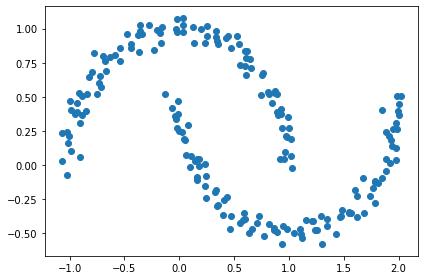

In [0]:
# make moons data
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

### Compare K-means and hierarchical clustering

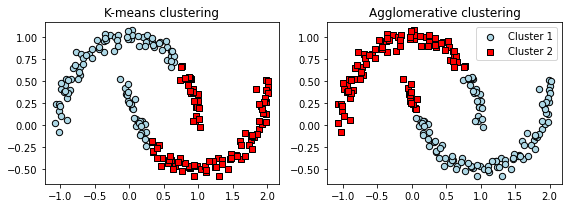

In [0]:
# run k-means and hierarchical clustering
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='Cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

### Density-based clustering

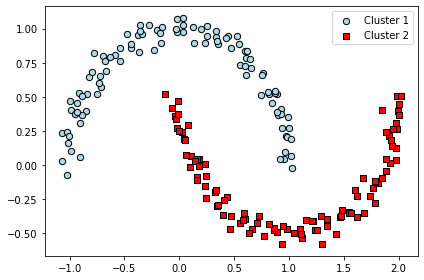

In [0]:
# dbscan
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='Cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

<br>
<br>

<br>
<br>